<img src = "https://drive.google.com/uc?export=view&id=14reVO1X6LsjqJ3cFgoeHxxddZVGfZn3t" alt = "Encabezado MLDS" width = "100%">  </img>

# **Taller 3: Ciclo de vida de ciencia de datos**
---

En este notebook evaluaremos los conceptos aprendidos sobre el ciclo de vida de ciencia de datos. En especial, entrenaremos un modelo con la librería `xgboost` con su debida optimización de hiperparámetros.

Ejecute las siguientes celdas para conectarse a UNCode:

In [1]:
!pip install rlxcrypt
!wget --no-cache -O session.pye -q https://raw.githubusercontent.com/JuezUN/INGInious/master/external%20libs/session.pye

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.6/350.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.7 MB/s eta 0:00:00
  Created wheel for imphook: filename=imphook-1.0-py3-none-any.whl size=9421 sha256=6b2468a3599ce364169a54b9cc11af7613d5e72a2768debbb1ab939ba6cfcd51
  Stored in directory: /root/.cache/pip/wheels/40/5c/0c/7f56cc2280f6e327d71786abc6a97decadb0639ef63c4713ef
Successfully built imphook


In [2]:
import rlxcrypt
import session

grader = session.LoginSequence("MAPEDDACML-GroupMLDS-6-2025-1@a75bcb8c-da5d-4461-b3fc-51e8ab8ee2f6")

Please enter your UNCode username: atrillerasmar@unal.edu.co
Please enter your password: ··········


Comenzamos instalando las librerías y herramientas necesarias:

In [ ]:
#!pip install mlflow
#!pip install optuna optuna-dashboard mlflow xgboost
#!pip install -U scikit-learn

In [3]:
!pip install mlflow==2.17.1
!pip install optuna optuna-dashboard mlflow xgboost
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found exi

Importamos las librerías necesarias:

In [4]:
# Librerías de utilidad para manipulación y visualización de datos.
import os, mlflow, optuna
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from IPython import get_ipython
from IPython.display import display
plt.style.use("ggplot")

# Ignorar warnings.
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Versiones de las librerías usadas.
import sklearn
!python --version
print('MLflow', mlflow.__version__)
print('Optuna', optuna.__version__)
print('Scikit-learn', sklearn.__version__)

Python 3.11.13
MLflow 2.17.1
Optuna 4.4.0
Scikit-learn 1.7.0


Esta actividad se realizó con las siguientes versiones:
*  Python 3.10.12
*  Scikit-learn 1.4.2
*  MLflow 2.12.1
*  Optuna 3.6.1

> **La tarea es incremental, por lo tanto es recomendable resolver los puntos en orden**

## **Carga de datos**
---

En este caso, utilizaremos un conjunto de datos sintético generado desde `sklearn`. Se trata de un *dataset* sintético utilizado comúnmente para tareas de clasificación binaria en aprendizaje automático. Este conjunto de datos consta de dos características continuas y una etiqueta binaria que indica a qué círculo pertenece cada punto.

Específicamente, la función `make_circles` crea un conjunto de puntos distribuidos uniformemente en dos círculos concéntricos, donde la distancia entre los dos círculos es ajustable. La distribución de puntos dentro de cada círculo se controla mediante el parámetro `noise`, que agrega ruido aleatorio a la posición de cada punto.

En general, este conjunto de datos se utiliza para evaluar la capacidad de los algoritmos de clasificación para separar clases no lineales en un espacio bidimensional. Debido a que los dos círculos se superponen, es imposible separar completamente las dos clases con una frontera de decisión lineal. Por lo tanto, se requieren técnicas más avanzadas, como la utilización de modelos no lineales, para clasificar adecuadamente los puntos en este conjunto de datos.

Vamos a generarlo:

In [6]:
features, labels = make_circles(
    n_samples=1000,
    noise=0.1,
    factor=0.5,
    random_state=0
    )

Podemos visualizar el conjunto de datos:

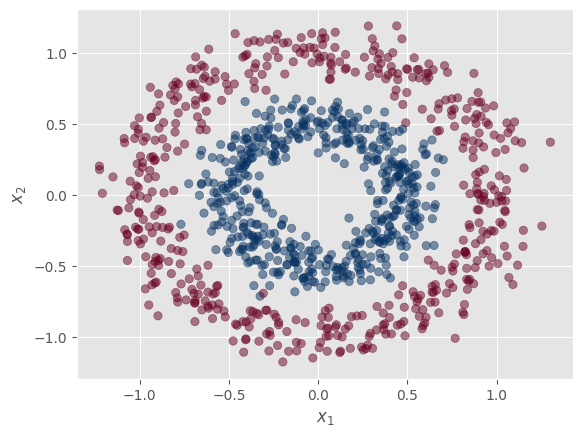

In [7]:
## KEEPOUTPUT
fig, ax = plt.subplots()
ax.scatter(features[:, 0], features[:, 1], c=labels, alpha=0.5, cmap="RdBu")
ax.set(xlabel="$x_1$", ylabel="$x_2$")
fig.show()

Adicionalmente, vamos a configurar el servidor de `mlflow`:

In [8]:
command = """
mlflow server \
        --backend-store-uri sqlite:///tracking.db \
        --default-artifact-root file:mlruns \
        -p 5000 &
"""
get_ipython().system_raw(command)

Utilizaremos `ngrok` para acceder al tablero de `mlflow`:

In [9]:
!pip install pyngrok

Ahora debe agregar su token de `ngrok`:

In [10]:
token = "2zFQ27y7OOwYgbnCISGgV3JsSuv_3iofXqkfm971m5QuFR1NY" # Agregue el token dentro de las comillas
os.environ["NGROK_TOKEN"] = token

Nos autenticamos en ngrok:

In [11]:
!ngrok authtoken $NGROK_TOKEN

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


Ahora, lanzamos la conexión con ngrok:

In [12]:
from pyngrok import ngrok
ngrok.connect(5000, "http")

ERROR:pyngrok.process.ngrok:t=2025-07-08T23:43:16+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
ERROR:pyngrok.process.ngrok:t=2025-07-08T23:43:16+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok st

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.

Especificamos que MLFlow debe usar el servidor que estamos manejando.

In [13]:
mlflow.set_tracking_uri("http://localhost:5000")

Creamos un experimento:

In [14]:
exp = mlflow.create_experiment(name="circles", artifact_location="mlruns")

Dividimos el conjunto de datos en entrenamiento y prueba:

In [15]:
features_train, features_test, labels_train, labels_test = train_test_split(
        features, labels, test_size=0.3, random_state=0
        )

## **1. Entrenamiento de Modelo**
---

En este punto deberá implementar una función que permita entrenar un modelo de `xgboost` dados los datos de entrenamiento y los hiperparámetros que exploráremos más adelante.

Para esto debe implementar la función `train_model` la cual toma como entrada las características y etiquetas de entrenamiento, la profundidad de los árboles, el número de estimadores, y la taza de aprendizaje. La función debe retornar el modelo entrenado.

**Parámetros**

- `features`: matriz de características de entrenamiento.
- `labels`: vector de etiquetas de entrenamiento.
- `max_depth`: profundidad máxima del árbol.
- `n_estimators`: número de estimadores.
- `learning_rate`: taza de aprendizaje.
- `random_state`: semilla de números aleatorios.

**Retorna**

- `model`: modelo de `xgboost` entrenado.

In [16]:
from xgboost import XGBClassifier

def train_model(features, labels, max_depth, n_estimators, learning_rate, random_state):
    """
    Entrena un modelo de XGBoost con los hiperparámetros especificados.

    Parámetros:
    - features: matriz de características de entrenamiento.
    - labels: vector de etiquetas de entrenamiento.
    - max_depth: profundidad máxima de los árboles.
    - n_estimators: número de árboles (estimadores).
    - learning_rate: tasa de aprendizaje.
    - random_state: semilla para reproducibilidad.

    Retorna:
    - model: modelo XGBoost entrenado.
    """
    model = XGBClassifier(
        max_depth=max_depth,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=random_state
    )
    model.fit(features, labels)
    return model

Use las siguientes celdas para probar su solución:

In [17]:
#TEST_CELL
model = train_model(
        features=features_train,
        labels=labels_train,
        max_depth=2,
        n_estimators=10,
        learning_rate=1e-4,
        random_state=0
        )
print(model.max_depth)
print(model.n_estimators)
print(model.learning_rate)

2
10
0.0001


**Salida esperada**

En este caso debería obtener los hiperparámetros del modelo:

```python
❱ print(model.max_depth)
2

❱ print(model.n_estimators)
10

❱ print(model.learning_rate)
0.0001
```

In [18]:
#TEST_CELL
model = train_model(
        features=features_train,
        labels=labels_train,
        max_depth=2,
        n_estimators=10,
        learning_rate=1e-4,
        random_state=0
        )
print(model.score(features_test, labels_test))

0.48333333333333334


**Salida esperada**

En este caso debería obtener el accuracy del modelo:

```python
❱ print(model.score(features_test, labels_test))
0.48333333333333334
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Recuerde que `XGBClassifier` funciona de una forma equivalente a `sklearn`.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Valide que está usando los parámetros de la función y no las variables globales.
</details>

#### **Evaluar código**

In [19]:
grader.run_test("Test 1_1", globals())

Test 1_1


## **2. Evaluación del modelo**
---

En este punto debe implementar una función que permita calcular el `f1_score` sobre el conjunto de evaluación a partir de un modelo entrenado.

Para esto, debe implementar la función `eval_model`, la cual toma como entrada un modelo entrenado, las características y el vector de etiquetas de evaluación. Debe retornar el valor de la métrica.

**Parámetros**

- `model`: modelo entrenado.
- `features`: conjunto de datos de evaluación.
- `labels`: etiquetas de evaluación.

**Retorna**

- `score`: f1-score.

In [20]:
import numpy as np
from sklearn.metrics import f1_score

# FUNCIÓN CALIFICADA eval_model:
def eval_model(
    model,
    features,
    labels,
    ):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    predictions = model.predict(features)
    score = f1_score(labels, predictions)
    return np.float64(score)
    ### FIN DEL CÓDIGO ###

Use las siguientes celdas para probar su solución:

In [21]:
#TEST_CELL
model = train_model(
        features=features_train,
        labels=labels_train,
        max_depth=4,
        n_estimators=100,
        learning_rate=1e-3,
        random_state=0
        )
score = eval_model(model, features_test, labels_test)
print(score)

0.9770491803278688


**Salida esperada**:

En este caso debería obtener la métrica de desempeño para el modelo de los hiperparámetros dados.

```python
❱ print(score)
0.0.9770491803278688
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Para evaluar el f1-score puede usar la función `f1_score` de `sklearn`.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Debe obtener las predicciones del modelo con el método `predict`.
</details>

#### **Evaluar código**

In [22]:
grader.run_test("Test 2_1_1", globals())

Test 2_1_1


In [23]:
grader.run_test("Test 2_1_2", globals())

Test 2_1_2


## **3. Ejecución en MLFlow**
---

Ahora, deberá crear una función que permita crear un **run** en `mlflow` para entrenar el modelo con sus correspondientes hiperparámetros bajo un experimento específico. Debe registrar el modelo, los hiperparámetros y la métrica del modelo que calcula en el punto anterior.

Para ello deberá implementar la función `mlflow_run`, la cual toma como entrada las características y etiquetas de entrenamiento, la profundidad máxima del modelo, el número de estimadores, la taza de aprendizaje y el experimento de `mlflow`. Debe retornar la ejecución y el valor de la métrica del modelo.

**Parámetros**

- `features_train`: matriz de características de entrenamiento.
- `labels_train`: vector de etiquetas de entrenamiento.
- `features_test`: matriz de características de evaluación.
- `labels_test`: vector de etiquetas de evaluación.
- `max_depth`: profundidad máxima del árbol.
- `n_estimators`: número de estimadores.
- `learning_rate`: taza de aprendizaje.
- `random_state`: semilla de números aleatorios.
- `exp`: experimento de `mlflow`.
- `run_name`: nombre a asignar a la ejecución.

**Retorna**

- `run`: ejecución de `mlflow`.
- `score`: valor de la métrica en la ejecución.

In [26]:
# FUNCIÓN CALIFICADA mlflow_run:
def mlflow_run(
    features_train,
    labels_train,
    features_test,
    labels_test,
    max_depth,
    n_estimators,
    learning_rate,
    random_state,
    exp,
    run_name
    ):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    with mlflow.start_run(experiment_id=exp, run_name=run_name) as run:
      mlflow.log_param("max_depth", max_depth)
      mlflow.log_param("n_estimators", n_estimators)
      mlflow.log_param("learning_rate", learning_rate)
      mlflow.log_param("random_state", random_state)
      model = train_model(
        features_train,
        labels_train,
        max_depth,
        n_estimators,
        learning_rate,
        random_state)
      score = eval_model(model, features_test, labels_test)
      input_example = features_train[:1]
      mlflow.xgboost.log_model(model, "model", input_example=input_example)
      mlflow.log_metrics({"accuracy": score})
      mlflow.end_run()
      return run, score

    ### FIN DEL CÓDIGO ###

Use las siguientes celdas para probar su solución:

In [27]:
#TEST_CELL
run, score = mlflow_run(
        features_train=features_train,
        labels_train=labels_train,
        features_test=features_test,
        labels_test=labels_test,
        max_depth=4,
        n_estimators=100,
        learning_rate=1e-3,
        random_state=0,
        exp=exp,
        run_name="test_case"
        )
print(run.info.run_name)
print(os.listdir(run.info.artifact_uri))
print(score)

2025/07/08 23:48:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run test_case at: http://localhost:5000/#/experiments/1/runs/ed743993cb76407cbbde50daab5a356b.
2025/07/08 23:48:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.


test_case
['model']
0.9770491803278688


**Salida esperada**:

En este caso debería obtener los metadatos de la ejecución y el valor de la métrica:

```python
❱ print(run.info.run_name)
test_case

❱ print(os.listdir(run.info.artifact_uri))
['model']

❱ print(score)
0.9770491803278689
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Recuerde usar de forma adecuada las particiones de entrenamiento y prueba con las funciones `train_model` y `eval_model` respectivamente.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Recuerde terminar la ejecución con la función `mlflow.end_run()`.
</details>

#### **Evaluar código**

In [28]:
grader.run_test("Test 3_1_1", globals())

Test 3_1_1


2025/07/08 23:48:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run UNTest_1 at: http://localhost:5000/#/experiments/1/runs/71e5b54af4884108a5c4c3c2f63409b9.
2025/07/08 23:48:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
2025/07/08 23:48:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/07/08 23:48:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run UNTest_1 at: http://localhost:5000/#/experiments/1/runs/e91a98cc762c4d83a3ceb826a404065b.
2025/07/08 23:48:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.


In [29]:
grader.run_test("Test 3_1_2", globals())

Test 3_1_2


2025/07/08 23:48:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run UNTest_2 at: http://localhost:5000/#/experiments/1/runs/90cb5d3a5543454cab05769fcf379659.
2025/07/08 23:48:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
2025/07/08 23:48:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/07/08 23:48:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run UNTest_2 at: http://localhost:5000/#/experiments/1/runs/5bce4f7365134271ad513bc9fbf25454.
2025/07/08 23:48:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.


## **4. Optimización de Hiperparámetros**
---

Ahora debe implementar la función objetivo para optimizar los hiper-parámetros con optuna. En específico debe variar los valores de la siguiente forma:

- `max_depth`: valor entero entre 2 y 10.
- `n_estimators`: valor entero entre 25 y 200.
- `learning_rate`: valor continuo entre 1e-6 y 1 (variaciones logarítmicas).

Todos los intentos deben estar registrados dentro de `mlflow`, para esto debe utilizar el experimento que está definido en la variable `exp`, como `run_name` debe utilizar el valor `"optuna"` y debe utilizar el valor 0 como `random_state`.

Debe implementar la función `objective` la cual toma como entrada un trial de `optuna` y debe retornar el valor de la métrica a maximizar.

**Parámetros**:

- `trial`: objeto `trial` de `optuna`.

**Retorna**:

- `score`: f1-score.

In [ ]:
# FUNCIÓN CALIFICADA objective:
def objective(trial):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    score = ...
    return score
    ### FIN DEL CÓDIGO ###

In [30]:
import optuna

# FUNCIÓN CALIFICADA objective:
def objective(trial):
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    # Sugerir hiperparámetros
    max_depth = trial.suggest_int("max_depth", 2, 10)
    n_estimators = trial.suggest_int("n_estimators", 25, 200)
    learning_rate = trial.suggest_float("learning_rate", 1e-6, 1.0, log=True)

    # Ejecutar experimento y registrar en MLflow
    run, score = mlflow_run(
        features_train=features_train,
        labels_train=labels_train,
        features_test=features_test,
        labels_test=labels_test,
        max_depth=max_depth,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=0,
        exp=exp,  # Este debe ser el ID del experimento
        run_name="optuna"
    )

    return score
    ### FIN DEL CÓDIGO ###

Use las siguientes celdas para probar su solución:

In [31]:
#TEST_CELL
study = optuna.create_study(
    direction="maximize",
    storage="sqlite:///hp.db",
    study_name="circles",
    )
study.optimize(func=objective, n_trials=30, n_jobs=1)

[I 2025-07-08 23:54:09,325] A new study created in RDB with name: circles


2025/07/08 23:54:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/cf48e5f6d320479d9859ad0932e8a7e4.
2025/07/08 23:54:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:54:13,835] Trial 0 finished with value: 0.0 and parameters: {'max_depth': 7, 'n_estimators': 63, 'learning_rate': 2.931423574778418e-06}. Best is trial 0 with value: 0.0.


2025/07/08 23:54:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/34f79b6c742a4c7aa9f43ddd04205798.
2025/07/08 23:54:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:54:18,025] Trial 1 finished with value: 0.9935897435897436 and parameters: {'max_depth': 2, 'n_estimators': 186, 'learning_rate': 0.08581683792903858}. Best is trial 1 with value: 0.9935897435897436.


2025/07/08 23:54:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/d6343c2fb83742ea8c9bfb0b26775b8b.
2025/07/08 23:54:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:54:21,812] Trial 2 finished with value: 0.9902912621359223 and parameters: {'max_depth': 9, 'n_estimators': 105, 'learning_rate': 0.0004220471342751274}. Best is trial 1 with value: 0.9935897435897436.


2025/07/08 23:54:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/fba28019811d47b88644e5cd75756ff5.
2025/07/08 23:54:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:54:27,178] Trial 3 finished with value: 0.9935483870967742 and parameters: {'max_depth': 2, 'n_estimators': 90, 'learning_rate': 0.11828308212072734}. Best is trial 1 with value: 0.9935897435897436.


2025/07/08 23:54:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/a1498d7edd9f4ccab6a3802bacbeda1c.
2025/07/08 23:54:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:54:31,073] Trial 4 finished with value: 0.0 and parameters: {'max_depth': 4, 'n_estimators': 70, 'learning_rate': 3.4705570185579893e-06}. Best is trial 1 with value: 0.9935897435897436.


2025/07/08 23:54:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/a5774914bef34c1b8ea28bf29c1ca080.
2025/07/08 23:54:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:54:34,711] Trial 5 finished with value: 0.9967845659163987 and parameters: {'max_depth': 8, 'n_estimators': 55, 'learning_rate': 0.4462075066161892}. Best is trial 5 with value: 0.9967845659163987.


2025/07/08 23:54:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/f3b333f58c42430bb3e692e67e003e1b.
2025/07/08 23:54:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:54:38,553] Trial 6 finished with value: 0.0 and parameters: {'max_depth': 2, 'n_estimators': 110, 'learning_rate': 3.674228854130193e-05}. Best is trial 5 with value: 0.9967845659163987.


2025/07/08 23:54:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/10d5d8c0e1614177b5e3159d4756656f.
2025/07/08 23:54:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:54:43,110] Trial 7 finished with value: 0.0 and parameters: {'max_depth': 5, 'n_estimators': 72, 'learning_rate': 6.2973008349071275e-06}. Best is trial 5 with value: 0.9967845659163987.


2025/07/08 23:54:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/c16a2cd0b84c4bab98234763ff1689df.
2025/07/08 23:54:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:54:46,731] Trial 8 finished with value: 0.0 and parameters: {'max_depth': 3, 'n_estimators': 143, 'learning_rate': 8.054130745082505e-06}. Best is trial 5 with value: 0.9967845659163987.


2025/07/08 23:54:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/cc7334d4121e4d28a1dfa8eebe72a832.
2025/07/08 23:54:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:54:50,303] Trial 9 finished with value: 0.9967845659163987 and parameters: {'max_depth': 3, 'n_estimators': 75, 'learning_rate': 0.09381084870339684}. Best is trial 5 with value: 0.9967845659163987.


2025/07/08 23:54:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/49f6e79047eb4ddf8f158394d3ee9116.
2025/07/08 23:54:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:54:55,029] Trial 10 finished with value: 0.9903536977491961 and parameters: {'max_depth': 10, 'n_estimators': 31, 'learning_rate': 0.006835162330209941}. Best is trial 5 with value: 0.9967845659163987.


2025/07/08 23:54:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/587198392187421197a4b6b970cf9ee5.
2025/07/08 23:54:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:54:58,584] Trial 11 finished with value: 0.9967845659163987 and parameters: {'max_depth': 7, 'n_estimators': 35, 'learning_rate': 0.7101484406701306}. Best is trial 5 with value: 0.9967845659163987.


2025/07/08 23:55:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/944fb2d74e634d6098acd1e581c64e2d.
2025/07/08 23:55:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:02,219] Trial 12 finished with value: 0.9903536977491961 and parameters: {'max_depth': 8, 'n_estimators': 49, 'learning_rate': 0.009606143256805864}. Best is trial 5 with value: 0.9967845659163987.


2025/07/08 23:55:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/6cf065c4d53244a99582e675f141a452.
2025/07/08 23:55:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:06,359] Trial 13 finished with value: 1.0 and parameters: {'max_depth': 6, 'n_estimators': 140, 'learning_rate': 0.6563291234476596}. Best is trial 13 with value: 1.0.


2025/07/08 23:55:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/9e402f4560a743708f56c4beacf36d28.
2025/07/08 23:55:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:10,739] Trial 14 finished with value: 0.9967845659163987 and parameters: {'max_depth': 6, 'n_estimators': 146, 'learning_rate': 0.9204648105917255}. Best is trial 13 with value: 1.0.


2025/07/08 23:55:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/cbe2e063cebd4b5a8b1385b5a41b4ef0.
2025/07/08 23:55:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:14,409] Trial 15 finished with value: 0.9903536977491961 and parameters: {'max_depth': 6, 'n_estimators': 139, 'learning_rate': 0.01091268326449967}. Best is trial 13 with value: 1.0.


2025/07/08 23:55:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/91193f4a6bd74684b04eaa95a13633ed.
2025/07/08 23:55:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:18,367] Trial 16 finished with value: 0.9903536977491961 and parameters: {'max_depth': 8, 'n_estimators': 175, 'learning_rate': 0.0007647563304855723}. Best is trial 13 with value: 1.0.


2025/07/08 23:55:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/7151d79c9891483e82f56d622d00a546.
2025/07/08 23:55:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:23,258] Trial 17 finished with value: 1.0 and parameters: {'max_depth': 10, 'n_estimators': 127, 'learning_rate': 0.27166562516944553}. Best is trial 13 with value: 1.0.


2025/07/08 23:55:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/1bda8db916904fe0812b97052ceb6653.
2025/07/08 23:55:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:27,290] Trial 18 finished with value: 0.9904153354632588 and parameters: {'max_depth': 10, 'n_estimators': 129, 'learning_rate': 0.029095136852432448}. Best is trial 13 with value: 1.0.


2025/07/08 23:55:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/75139bcc5a9242b2a82fbce7c934623e.
2025/07/08 23:55:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:30,933] Trial 19 finished with value: 0.9735099337748344 and parameters: {'max_depth': 5, 'n_estimators': 170, 'learning_rate': 0.00011528822056232761}. Best is trial 13 with value: 1.0.


2025/07/08 23:55:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/7b88353320e84933960c60b334a074bd.
2025/07/08 23:55:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:35,740] Trial 20 finished with value: 1.0 and parameters: {'max_depth': 5, 'n_estimators': 124, 'learning_rate': 0.19241070954173142}. Best is trial 13 with value: 1.0.


2025/07/08 23:55:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/8f8b02ebda4f449cb67c906e5d83d8ea.
2025/07/08 23:55:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:39,464] Trial 21 finished with value: 1.0 and parameters: {'max_depth': 5, 'n_estimators': 124, 'learning_rate': 0.23863062144733072}. Best is trial 13 with value: 1.0.


2025/07/08 23:55:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/6f6edf50d3954540a61bfcb5280c1416.
2025/07/08 23:55:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:43,188] Trial 22 finished with value: 0.9904153354632588 and parameters: {'max_depth': 7, 'n_estimators': 161, 'learning_rate': 0.028249347717336355}. Best is trial 13 with value: 1.0.


2025/07/08 23:55:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/0a0c23eae1454585be5650be5d3df4f3.
2025/07/08 23:55:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:47,452] Trial 23 finished with value: 1.0 and parameters: {'max_depth': 4, 'n_estimators': 198, 'learning_rate': 0.240170742874166}. Best is trial 13 with value: 1.0.


2025/07/08 23:55:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/0f6869f479264b31b58c70ea59a86d16.
2025/07/08 23:55:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:51,672] Trial 24 finished with value: 0.9903536977491961 and parameters: {'max_depth': 6, 'n_estimators': 97, 'learning_rate': 0.003965229059484711}. Best is trial 13 with value: 1.0.


2025/07/08 23:55:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/bc21360bc6ec47dea7db20616ea5363d.
2025/07/08 23:55:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:55,327] Trial 25 finished with value: 0.9935897435897436 and parameters: {'max_depth': 4, 'n_estimators': 123, 'learning_rate': 0.04841688586833629}. Best is trial 13 with value: 1.0.


2025/07/08 23:55:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/7a0024149c02442885cee486c2c388ea.
2025/07/08 23:55:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:55:58,920] Trial 26 finished with value: 0.9967845659163987 and parameters: {'max_depth': 9, 'n_estimators': 156, 'learning_rate': 0.2280204098185546}. Best is trial 13 with value: 1.0.


2025/07/08 23:56:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/ce38804db5c24133bb0811b0e47c3492.
2025/07/08 23:56:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:56:03,699] Trial 27 finished with value: 1.0 and parameters: {'max_depth': 5, 'n_estimators': 88, 'learning_rate': 0.9138193824866703}. Best is trial 13 with value: 1.0.


2025/07/08 23:56:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/04d7a284d9e349099449650882328353.
2025/07/08 23:56:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:56:07,360] Trial 28 finished with value: 0.9903536977491961 and parameters: {'max_depth': 6, 'n_estimators': 132, 'learning_rate': 0.0024390430452471534}. Best is trial 13 with value: 1.0.


2025/07/08 23:56:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run optuna at: http://localhost:5000/#/experiments/1/runs/832d28eae20a43c1a8fefddb1308f1a0.
2025/07/08 23:56:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
[I 2025-07-08 23:56:11,016] Trial 29 finished with value: 0.9871794871794872 and parameters: {'max_depth': 7, 'n_estimators': 115, 'learning_rate': 0.025046860866433936}. Best is trial 13 with value: 1.0.


Si se dirige al dashboard de `mlflow`, deberá obtener varias ejecuciones bajo el nombre `optuna`. Puede filtrarlas todas al poner el filtro que se muestra en la imagen:

<img src="https://drive.google.com/uc?export=view&id=1j_7LYVWNADfVTW3YqUzhpcEHOaEPXXZ7" width="80%">

También debe seleccionar todos los runs con el nombre `optuna` y dar click en `compare`. Esto debe generar el siguiente resultado:

<img src="https://drive.google.com/uc?export=view&id=1CFnfmGdu0pgUbrGri-T8oNSafxQZAHSn" width="80%">

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Puede utilizar el método `suggest_int` de un `Trial` para generar un hiperparámetro de tipo entero.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Puede utilizar el método `suggest_float` de un `Trial` para generar un hiperparámetro continúo.
</details>

## **5. Versionado de Modelo**
---

Por último, en este punto deberá generar una versión del mejor modelo con el nombre `xgboost` versión 1. Posteriormente, debe implementar una función que permita cargar el modelo:

Para esto deberá implementar la función `load_model` la cual debe retornar el modelo versionado como `xgboost` versión 1:

**Parámetros**

La función no tiene parámetros de entrada.

**Retorna**

- `model`: modelo cargado con `mlflow`.

In [37]:
mlflow.register_model(
    model_uri=f"runs:/{run.info.run_id}/model",
    name="xgboost"
)

Successfully registered model 'xgboost'.
2025/07/09 00:13:50 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: xgboost, version 1
Created version '1' of model 'xgboost'.


<ModelVersion: aliases=[], creation_timestamp=1752020030505, current_stage='None', description='', last_updated_timestamp=1752020030505, name='xgboost', run_id='ed743993cb76407cbbde50daab5a356b', run_link='', source='/content/mlruns/ed743993cb76407cbbde50daab5a356b/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='1'>

In [38]:
import mlflow.pyfunc

def load_model():
    """
    Carga el modelo registrado en MLflow bajo el nombre 'xgboost versión 1'.

    Retorna:
        model: modelo cargado (objeto PyFunc compatible con predict).
    """
    model_uri = "models:/xgboost/1"  # versión 1 del modelo registrado
    model = mlflow.pyfunc.load_model(model_uri)
    return model

In [ ]:
# FUNCIÓN CALIFICADA load_model:
def load_model():
    ### ESCRIBA SU CÓDIGO AQUÍ ###
    model = ...
    return model
    ### FIN DEL CÓDIGO ###

Use las siguientes celdas para probar su solución:

In [39]:
#TEST_CELL
model = load_model()
y_pred = model.predict(features_test)
print(f1_score(labels_test, y_pred))

0.9770491803278688


**Salida esperada**

En este caso debería obtener la métrica sobre el mejor modelo en el conjunto de evaluación.

```python
❱ print(f1_score(labels_test, y_pred))
0.9871794871794872
```

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 1</b></font>
</summary>

* Recuerde versionar el modelo antes de cargarlo.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 2</b></font>
</summary>

* Puede ordenar las ejecuciones de `mlflow` de acuerdo a `score` y con esto seleccionar el mejor modelo.
</details>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Pista 3</b></font>
</summary>

* Puede cargar un modelo versionado con la función `mlflow.pyfunc.load_model`.
</details>

#### **Evaluar código**

In [40]:
grader.run_test("Test 5_1", globals())

Test 5_1


# **Evaluación**

In [41]:
grader.submit_task(globals())

Test 1_1
Test 2_1_1
Test 2_1_2
Test 3_1_1


2025/07/09 00:15:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run UNTest_1 at: http://localhost:5000/#/experiments/1/runs/e3c4c9d09c71419892859e969f04c46b.
2025/07/09 00:15:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
2025/07/09 00:15:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/07/09 00:15:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run UNTest_1 at: http://localhost:5000/#/experiments/1/runs/b690c1810f91428fbcc919e0e97553cd.
2025/07/09 00:15:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.


Test 3_1_2


2025/07/09 00:15:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run UNTest_2 at: http://localhost:5000/#/experiments/1/runs/4d6d962395744390a2011cab69f5f710.
2025/07/09 00:15:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.
2025/07/09 00:15:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/07/09 00:15:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run UNTest_2 at: http://localhost:5000/#/experiments/1/runs/b2d97fc3bc1f4901b0ccfb8d341c6916.
2025/07/09 00:15:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.


Test 5_1


# **Créditos**
---

* **Profesor:** [Jorge E. Camargo, PhD](https://dis.unal.edu.co/~jecamargom/).

* **Asistentes docentes:** [Juan Sebastián Lara Ramírez](https://www.linkedin.com/in/juan-sebastian-lara-ramirez-43570a214/).
* **Diseño de imágenes:**
  - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandra-superlano-02b74313a/).
  - [Mario Andrés Rodríguez Triana](mailto:mrodrigueztr@unal.edu.co).

* **Coordinador de virtualización:** [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*